In [1]:
collab = False

In [2]:
if collab:
    !pip3 install tensorflow pandas numpy matplotlib yahoo_fin sklearn fredapi openpyxl

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from yahoo_fin import stock_info as si
from collections import deque

import os
import numpy as np
import pandas as pd
import random
from fredapi import Fred

from distutils.dir_util import copy_tree
import shutil

In [4]:
def create_folders(folders):
    for dir in folders:
        if not os.path.isdir(dir):
            os.mkdir(dir)

def delete_folders(folders):
    for dir in folders:
        if os.path.exists(dir):          
            shutil.rmtree(dir, ignore_errors=True)
            
# delete_folders(["2000_test2021_ema100"])

In [5]:
series_ids = [
    'CHNCPIALLMINMEI','USACPIALLMINMEI','BRACPIALLMINMEI','INDCPIALLMINMEI','BRAPROINDMISMEI'
    ,'USAPROINDMISMEI','PCUOMFGOMFG','RUSCPIALLMINMEI','PIEATI02RUM661N','RUSPROMANMISMEI'
    ,'UNRATENSA','GS10','M2NS','INTDSRUSM193N','TOTALNSA','MABMM301USM189S','ALTSALES','RSXFSN'
    ,'HTRUCKSSA','M2REAL','M1NS','BUSLOANS','MCOILWTICO','DAUPNSA','FRGSHPUSM649NCIS','PCU33443344'
    ,'AISRSA' ,'M1REAL','TRUCKD11','RAILFRTCARLOADS','MNFCTRIRNSA','DAUTOSAAR'
    ,'LTOTALNSA','MVMTD027MNFRBDAL','USEPUINDXM','CEU4348400001','CEU1021100001'
    ,'IPG3361T3S','TRESEGUSM052N','LAUTONSA','WPU114','RSGASSN','CMRMT','NATURALGAS'
    ,'EMVOVERALLEMV','PCU483111483111','WPU101706','GASREGCOVM','WPU11','PCU48214821'
    ,'WPU1413','MRTSIR441USN','U36SNO','PCU21112111','IPB53122N','IPB54100N','EXUSEU'
    ,'PCU4841214841212','GASDESM','EXCHUS','IPN213111N','PCU21212121','WPU012'
    # ,'M1109BUSM293NNBR','PCU484484','IC131','JTU2300JOL','WPU801104','WPU3011','PCU33613361'
]
new_ticker = ['DX-Y.NYB']

# KBE:SPX XLF:SPX IYT:XLU XLU:XLP DBC:TLT IGE:XLP GDL:TLT GDX:GLD GDX:SPY QQQ:IVM

In [6]:
# 27%
# new_results = "2000_test2021_close_nstep100"
# FEATURE_COLUMNS = ["close"]

# 26%
# new_results = "1976_test2021_ema100_nstep100"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 


# 20%
# new_results = "2000_test2021_close_nstep25"
# FEATURE_COLUMNS = ["close"]

# 16%
# new_results = "2000_test2021_close_nstep10"
# FEATURE_COLUMNS = ["close"]

# 22%
# new_results = "2000_test2021_close_nstep5"
# FEATURE_COLUMNS = ["close"]

# 26%
new_results = "IBM_2000_test2021_close"
FEATURE_COLUMNS = ["close"]

# 23%
# new_results = "2000_test2021_close_body"
# FEATURE_COLUMNS = ["close","body"]

# 19% интересный результат
# new_results = "2000_test2021_close_body_abs"
# FEATURE_COLUMNS = ["close","body_abs"]

# 24%
# new_results = "2000_test2021_candles"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low"]

# 30%
# new_results = "2000_test2021_ema100"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"]

# 33%
# delete_folders(["2000_test2021_ema100_ep300"])
# new_results = "2000_test2021_ema100_ep300"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"]

# 26
# delete_folders(["2000_test2021_ema100_ep300_adds"])
# new_results = "2000_test2021_ema100_ep300_adds"
# FEATURE_COLUMNS = ["close", 
#                    "volume", 
#                    "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"]
# FEATURE_COLUMNS = FEATURE_COLUMNS + [
# #                                     'KBE:^GSPC',
#                                      'XLF:^GSPC',
# #                                     'IYT:XLU',
#                                     'XLU:XLP',
# #                                     'DBC:TLT',
# #                                     'IGE:XLP',
# #                                     'GDL:TLT','GDX:^GSPC'
#                                     ]

# 23
# new_results = "2000_test2021_ema100_new_ticker"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] + new_ticker 


# 27%
# new_results = "2000_test2021_ema50"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma50","26ema","12ema","MACD","ema","momentum"] 


# 29%
# new_results = "1976_test2021_ema100"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 

# 3year 83%
# new_results = "1976_test2019_ema100"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 

# 3 years 83%
# new_results = "1976_test2019_ema100_ep1500"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 

# 3 years 74%
# new_results = "1976_test2019_ema100_ep1500_Lookup_Stet10"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 

# 3 years -17%
# new_results = "1976_test2019_ema100_ep700_Lookup_Stet5"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 

# 3years 79%
# new_results = "1976_test2019_ema100_ep700_Lookup_Stet25"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 


# 3years 56%
# new_results = "1976_test2019_ema100_ep700_Lookup_Stet75"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 

# 3years 85%
# new_results = "1976_test2019_ema100_ep700_Lookup_Stet35"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 

# 3years 85%
# delete_folders(["1976_test2019_ema100_ep700_Lookup_Stet35"])
# new_results = "1976_test2019_ema100_ep700_Lookup_Stet35"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 


# 3 years 79%
# new_results = "1976_test2019_ema100_ep700_Lookup_Stet45"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 


# 16%
# new_results = "1976_test2021_candles"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low"]

# 28%
# new_results = "1976_test2021_close"
# FEATURE_COLUMNS = ["close"]

# 26% - интересно
# new_results = "1976_test2021_ema200"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma200","ma50","26ema","12ema","MACD","ema","momentum"] 


if collab:
    # Для работы с google диском
    from google.colab import drive
    drive.mount('/content/gdrive')
    import sys
    sys.path.append('/content/gdrive/MyDrive/Python/Market/')
    data_path = '/content/gdrive/MyDrive/Python/Market/Data/stock_predictions/'

    data_path = data_path + new_results

    create_folders([data_path, data_path + "/results", data_path + "/logs", data_path + "/data" ,data_path + "/test-results"])

In [7]:
if not collab:
    '''
    gpu_info = !nvidia-smi
    gpu_info = '\n'.join(gpu_info)
    if gpu_info.find('failed') >= 0:
      print('Select the Runtime → "Change runtime type" menu to enable a GPU accelerator, ')
      print('and then re-execute this cell.')
    else:
      print(gpu_info)
    '''
    
    # Активируем GPU
    import torch

    # setting device on GPU if available, else CPU
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print('Using device:', device)
    print()

    #Additional Info when using cuda
    if device.type == 'cuda':
        print(torch.cuda.get_device_name(0))
        print('Memory Usage:')
        print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
        print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

    if tf.config.list_physical_devices('GPU'):
        print()
        print("GPU работает")
        print(tf.config.list_physical_devices('GPU'))
    else:
        print()
        print("GPU не работает")
        sys.exit()

Using device: cuda

NVIDIA GeForce GT 730
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB

GPU работает
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


c:\users\sem\pycharmprojects\python.neural.market\venv\lib\site-packages\torch\cuda\__init__.py:120: UserWarning: 
    Found GPU%d %s which is of cuda capability %d.%d.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is %d.%d.
    
  warnings.warn(old_gpu_warn.format(d, name, major, minor, min_arch // 10, min_arch % 10))


In [8]:
fred = Fred(api_key='39fa3bd07f8f55540a93e075a5f97cc1')

In [9]:
# set seed, so we can get the same results after rerunning several times
np.random.seed(314)
tf.random.set_seed(314)
random.seed(314)

In [10]:
import os
import time
from tensorflow.keras.layers import LSTM

# def load_params():
# Window size or the sequence length
N_STEPS = 50
# Lookup step, 1 is the next day
LOOKUP_STEP = 15

# whether to scale feature columns & output price as well
SCALE = True
scale_str = f"sc-{int(SCALE)}"
# whether to shuffle the dataset
SHUFFLE = True
shuffle_str = f"sh-{int(SHUFFLE)}"
# whether to split the training/testing set by date
SPLIT_BY_DATE = True
split_by_date_str = f"sbd-{int(SPLIT_BY_DATE)}"
# test ratio size, 0.2 is 20%
TEST_SIZE = 0.2
# features to use
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ema100"] + series_ids 

# date now
date_now = time.strftime("%Y-%m-%d")

### model parameters

N_LAYERS = 2
# LSTM cell
CELL = LSTM
# 256 LSTM neurons
UNITS = 256
# 40% dropout
DROPOUT = 0.4
# whether to use bidirectional RNNs
BIDIRECTIONAL = False

### training parameters

# mean absolute error loss
# LOSS = "mae"
# huber loss
LOSS = "huber_loss"
OPTIMIZER = "adam"
# OPTIMIZER = "RMSProp"
BATCH_SIZE = 64
EPOCHS = 100

# Amazon stock market
ticker = "IBM"
ticker_data_filename = os.path.join(new_results + "/data", f"{ticker}_{date_now}")
# model name to save, making it as unique as possible based on parameters
model_name = f"{date_now}_{ticker}-{shuffle_str}-{scale_str}-{split_by_date_str}-\
{LOSS}-{OPTIMIZER}-{CELL.__name__}-seq-{N_STEPS}-step-{LOOKUP_STEP}-layers-{N_LAYERS}-units-{UNITS}"
if BIDIRECTIONAL:
    model_name += "-b"
        
# load_param()

In [11]:
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset['ma7'] = dataset['close'].rolling(window=7).mean()
    dataset['ma21'] = dataset['close'].rolling(window=21).mean()
    
    dataset['ma100'] = dataset['close'].rolling(window=100).mean()
    dataset['ma200'] = dataset['close'].rolling(window=200).mean()
    dataset['ma50'] = dataset['close'].rolling(window=50).mean()

    # Create MACD
    dataset['26ema'] = pd.Series.ewm(dataset['close'], span=26).mean()
    dataset['12ema'] = pd.Series.ewm(dataset['close'], span=12).mean()
    dataset['MACD'] = (dataset['12ema']-dataset['26ema'])

    # Create Bollinger Bands
    # dataset['20sd'] = pd.stats.moments.rolling_std(dataset['GS'],20)
    # dataset['upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    # dataset['lower_band'] = dataset['ma21'] - (dataset['20sd']*2)

    # Create Exponential moving average
    dataset['ema'] = dataset['close'].ewm(com=0.5).mean()

    # Create Momentum
    dataset['momentum'] = dataset['close']-1

    dataset['body'] = dataset['close'] - dataset['open']
    dataset['body_abs'] = abs(dataset['close'] - dataset['open'])

    dataset.replace('', np.nan, inplace=True)
    dataset = dataset.dropna()

    return dataset

In [12]:
def get_new_ticker(ticker_):
#     new_ticker = pd.DataFrame()
#     if not new_ticker.empty:
#         new_ticker = new_ticker.iloc[0:0]
    new_ticker = si.get_data(ticker_)
    new_ticker.rename(columns={'close':ticker_}, inplace=True)
    new_ticker.drop(['open', 'high','low','volume','ticker','adjclose'], axis='columns', inplace=True)
#     dataset = pd.concat([new_ticker , dataset], axis=1)
    
#     dataset.replace('', np.nan, inplace=True)
#     dataset = dataset.dropna()
    
    return new_ticker

def ratio_tickers(tickers_list):
    df_ticker = pd.DataFrame()
    for tickers in tickers_list:
        ticker = tickers.split(':')
        
        if not df_ticker.empty:
            df_ticker = pd.concat([df_ticker, get_new_ticker(ticker[0])  , get_new_ticker(ticker[1]) ], axis=1)
        else:
            df_ticker = pd.concat([get_new_ticker(ticker[0])  , get_new_ticker(ticker[1]) ], axis=1)

        df_ticker[tickers] = df_ticker[ticker[0]] / df_ticker[ticker[1]]   

        df_ticker.drop([ticker[0], ticker[1]], axis='columns', inplace=True)
#         if not sum_fickers.empty:
#             sum_tickers = pd.concat([sum_tickers,df_ticker], axis=1)
#         else:
#         sum_tickers = df_ticker.copy(deep=True)
#     df_ticker.to_excel("tickers.xlsx")
    
#     print(df_ticker)
    return df_ticker

#     ratio_tickers(['KBE:^GSPC','XLF:^GSPC','IYT:XLU','XLU:XLP','DBC:TLT','IGE:XLP','GDL:TLT','GDX:^GSPC',
# #                'QQQ:IVM'
#               ])
    


# KBE:SPX XLF:SPX IYT:XLU XLU:XLP DBC:TLT IGE:XLP GDL:TLT GDX:GLD GDX:SPY QQQ:IVM
    

In [13]:


# df = si.get_data(ticker,start_date = '2000-01-01')
# new_ticker = si.get_data(ticker)
# new_ticker.rename(columns={'close':'close_'+ ticker}, inplace=True)
# new_ticker.drop(['open', 'high','low','volume','ticker','adjclose'], axis='columns', inplace=True)
# dataset = pd.concat([new_ticker , df], axis=1)
# dataset.replace('', np.nan, inplace=True)
# dataset = new_ticker.dropna()
# for nT in new_ticker:
#     df = get_new_ticker(df,nT)
# dataset
# df = get_technical_indicators(df)
# print('KBE/^SPX'.split('/'))


In [14]:
# dataset_4 = pd.DataFrame()
# dt = get_new_ticker(dataset_4, 'KBE/^SPX')
# dt

In [15]:
# df

In [16]:
def shuffle_in_unison(a, b):
    # shuffle two arrays in the same way
    state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(state)
    np.random.shuffle(b)


def load_data(ticker, n_steps=50, scale=True, shuffle=True, lookup_step=1, split_by_date=True,
                test_size=0.2, feature_columns=['close', 'volume', 'open', 'high', 'low']):
    """
    Loads data from Yahoo Finance source, as well as scaling, shuffling, normalizing and splitting.
    Params:
        ticker (str/pd.DataFrame): the ticker you want to load, examples include AAPL, TESL, etc.
        n_steps (int): the historical sequence length (i.e window size) used to predict, default is 50
        scale (bool): whether to scale prices from 0 to 1, default is True
        shuffle (bool): whether to shuffle the dataset (both training & testing), default is True
        lookup_step (int): the future lookup step to predict, default is 1 (e.g next day)
        split_by_date (bool): whether we split the dataset into training/testing by date, setting it 
            to False will split datasets in a random way
        test_size (float): ratio for test data, default is 0.2 (20% testing data)
        feature_columns (list): the list of features to use to feed into the model, default is everything grabbed from yahoo_fin
    """
    df = pd.DataFrame()
    if not df.empty:
        df = df.iloc[0:0]
    # see if ticker is already a loaded stock from yahoo finance
    if isinstance(ticker, str):
        # load it from yahoo_fin library
#         df = si.get_data(ticker)
        df = si.get_data(ticker,start_date = '2000-01-01')
#         df = si.get_data(ticker,start_date = '2000-01-01', end_date = None, index_as_date = True, interval= "1mo")
#         df = si.get_data(ticker,start_date = '2000-01-01')
        # get_data(ticker, start_date = None, end_date = None, index_as_date = True, interval = “1d”)
    elif isinstance(ticker, pd.DataFrame):
        # already loaded, use it directly
        df = ticker
    else:
        raise TypeError("ticker can be either a str or a `pd.DataFrame` instances")
    
#     for nT in new_ticker:
#         df = get_new_ticker(df,nT)
#     df_ratio = ratio_tickers(['KBE:^GSPC','XLF:^GSPC','IYT:XLU','XLU:XLP','DBC:TLT','IGE:XLP','GDL:TLT','GDX:^GSPC',
# #                'QQQ:IVM'
#               ])
    
#     df = pd.concat([ df_ratio  , df ], axis=1)
    
    df = get_technical_indicators(df)
    
#     df_fred = get_fred()
#     df = pd.concat([df_fred , df], axis=1)

    df.replace('', np.nan, inplace=True)
    df = df.dropna()

    # print(df.tail)
    # this will contain all the elements we want to return from this function
    result = {}
    # we will also return the original dataframe itself
    result['df'] = df.copy()

    # make sure that the passed feature_columns exist in the dataframe
    for col in feature_columns:
        assert col in df.columns, f"'{col}' does not exist in the dataframe."

    # add date as a column
    if "date" not in df.columns:
        df["date"] = df.index

    if scale:
        column_scaler = {}
        # scale the data (prices) from 0 to 1
        for column in feature_columns:
            scaler = preprocessing.MinMaxScaler()
            df[column] = scaler.fit_transform(np.expand_dims(df[column].values, axis=1))
            column_scaler[column] = scaler

        # add the MinMaxScaler instances to the result returned
        result["column_scaler"] = column_scaler

    # add the target column (label) by shifting by `lookup_step`
    df['future'] = df['close'].shift(-lookup_step)

    # last `lookup_step` columns contains NaN in future column
    # get them before droping NaNs
    last_sequence = np.array(df[feature_columns].tail(lookup_step))
    
    # drop NaNs
    df.dropna(inplace=True)

    sequence_data = []
    sequences = deque(maxlen=n_steps)

    for entry, target in zip(df[feature_columns + ["date"]].values, df['future'].values):
        sequences.append(entry)
        if len(sequences) == n_steps:
            sequence_data.append([np.array(sequences), target])

    # get the last sequence by appending the last `n_step` sequence with `lookup_step` sequence
    # for instance, if n_steps=50 and lookup_step=10, last_sequence should be of 60 (that is 50+10) length
    # this last_sequence will be used to predict future stock prices that are not available in the dataset
    last_sequence = list([s[:len(feature_columns)] for s in sequences]) + list(last_sequence)
    last_sequence = np.array(last_sequence).astype(np.float32)
    # add to result
    result['last_sequence'] = last_sequence
    
    # construct the X's and y's
    X, y = [], []
    for seq, target in sequence_data:
        X.append(seq)
        y.append(target)

    # convert to numpy arrays
    X = np.array(X)
    y = np.array(y)

    if split_by_date:
        # split the dataset into training & testing sets by date (not randomly splitting)
        # train_samples = int((1 - test_size) * len(X))
        train_samples = len(X) - len(result['df'].loc['2021-01-01':])
        result["X_train"] = X[:train_samples]
        result["y_train"] = y[:train_samples]
        result["X_test"]  = X[train_samples:]
        result["y_test"]  = y[train_samples:]
        if shuffle:
            # shuffle the datasets for training (if shuffle parameter is set)
            shuffle_in_unison(result["X_train"], result["y_train"])
            shuffle_in_unison(result["X_test"], result["y_test"])
    else:    
        # split the dataset randomly
        result["X_train"], result["X_test"], result["y_train"], result["y_test"] = train_test_split(X, y, 
                                                                                test_size=test_size, shuffle=shuffle)

    # get the list of test set dates
    dates = result["X_test"][:, -1, -1]
    # retrieve test features from the original dataframe
    result["test_df"] = result["df"].loc[dates]
    # remove duplicated dates in the testing dataframe
    result["test_df"] = result["test_df"][~result["test_df"].index.duplicated(keep='first')]
    # remove dates from the training/testing sets & convert to float32
    result["X_train"] = result["X_train"][:, :, :len(feature_columns)].astype(np.float32)
    result["X_test"] = result["X_test"][:, :, :len(feature_columns)].astype(np.float32)

    return result

In [17]:
def get_fred():
    data_ = {}
    for series_id in series_ids:
        data_[series_id] = fred.get_series(series_id, observation_start='1/1/2000')
    dataset_ = pd.concat(data_, axis=1)

    # заполняем
    dataset_.replace('', np.nan, inplace=True)

    # заполняем пропуски в данных средним значением за последние 10 периодов
    dataset_=dataset_.fillna(dataset_[-10:].mean())
    return dataset_

In [18]:
def create_model(sequence_length, n_features, units=256, cell=LSTM, n_layers=2, dropout=0.3,
                loss="mean_absolute_error", optimizer="rmsprop", bidirectional=False):
    model = Sequential()
    for i in range(n_layers):
        if i == 0:
            # first layer
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences=True), batch_input_shape=(None, sequence_length, n_features)))
            else:
                model.add(cell(units, return_sequences=True, batch_input_shape=(None, sequence_length, n_features)))
        elif i == n_layers - 1:
            # last layer
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences=False)))
            else:
                model.add(cell(units, return_sequences=False))
        else:
            # hidden layers
            if bidirectional:
                model.add(Bidirectional(cell(units, return_sequences=True)))
            else:
                model.add(cell(units, return_sequences=True))
        # add dropout after each layer
        model.add(Dropout(dropout))
    model.add(Dense(1, activation="linear"))
    model.compile(loss=loss, metrics=["mean_absolute_error"], optimizer=optimizer)
    return model

In [19]:
# def compile_model():
# create these folders if they does not exist
create_folders([new_results, new_results + "/results", new_results + "/logs", new_results + "/data", new_results + "/test-results"])

# load the data
data = pd.DataFrame()
if not data.empty:
    data = data.iloc[0:0]
data = load_data(ticker, N_STEPS, scale=SCALE, split_by_date=SPLIT_BY_DATE, 
                shuffle=SHUFFLE, lookup_step=LOOKUP_STEP, test_size=TEST_SIZE, 
                feature_columns=FEATURE_COLUMNS)

# save the dataframe
data["df"].to_csv(ticker_data_filename + ".csv")
# data["df"].to_excel("view.xlsx")
data["df"].to_excel(ticker_data_filename + ".xlsx")

# construct the model
model = create_model(N_STEPS, len(FEATURE_COLUMNS), loss=LOSS, units=UNITS, cell=CELL, n_layers=N_LAYERS,
                    dropout=DROPOUT, optimizer=OPTIMIZER, bidirectional=BIDIRECTIONAL)


In [20]:
# data


In [21]:
# data["df"].to_excel("view_start.xlsx")

In [22]:
# def fit_model():
if not collab and os.path.exists(os.path.join(new_results + "/results", model_name + ".h5")):
    print("Модель уже просчитана, загружаем модель")
else:
    if tf.config.list_physical_devices('GPU'):
        print("Создаем новую модель" + new_results)
        # some tensorflow callbacks
        checkpointer = ModelCheckpoint(os.path.join(new_results + "/results", model_name + ".h5"), save_weights_only=True, save_best_only=True, verbose=1)
        tensorboard = TensorBoard(log_dir=os.path.join(new_results + "/logs", model_name))
        # train the model and save the weights whenever we see
        # a new optimal model using ModelCheckpoint
        history = model.fit(data["X_train"], data["y_train"],
                          batch_size=BATCH_SIZE,
                          epochs=EPOCHS,
                          validation_data=(data["X_test"], data["y_test"]),
                          callbacks=[checkpointer, tensorboard],
                          verbose=1)
    else:
        print("GPU не подключен")
        copy_tree(data_path + "/results",  new_results + "/results" )
        copy_tree(data_path + "/logs",  new_results + "/logs")
        copy_tree(data_path + "/data", new_results + "/data")
        copy_tree(data_path + "/test-results", new_results + "/test-results")

Создаем новую модельIBM_2000_test2021_close
Epoch 1/100
79/79 [==============================] - ETA: 0s - loss: 0.0052 - mean_absolute_error: 0.0662
Epoch 00001: val_loss improved from inf to 0.00094, saving model to IBM_2000_test2021_close/results\2021-12-08_IBM-sh-1-sc-1-sbd-1-huber_loss-adam-LSTM-seq-50-step-15-layers-2-units-256.h5
79/79 [==============================] - 23s 189ms/step - loss: 0.0052 - mean_absolute_error: 0.0662 - val_loss: 9.3751e-04 - val_mean_absolute_error: 0.0354
Epoch 2/100
79/79 [==============================] - ETA: 0s - loss: 0.0019 - mean_absolute_error: 0.0467
Epoch 00002: val_loss did not improve from 0.00094
79/79 [==============================] - 13s 170ms/step - loss: 0.0019 - mean_absolute_error: 0.0467 - val_loss: 9.9385e-04 - val_mean_absolute_error: 0.0361
Epoch 3/100
79/79 [==============================] - ETA: 0s - loss: 0.0020 - mean_absolute_error: 0.0472
Epoch 00003: val_loss did not improve from 0.00094
79/79 [========================

In [23]:
# EPOCHS = 10
# delete_folders([f"del__2000_test2021_close_ep{EPOCHS}",f"del__2000_test2021_close_body_ep{EPOCHS}"])

In [24]:
# compile_model()
# fit_model()
# load_params()
# EPOCHS = 10
# new_results = f"del__2000_test2021_close_ep{EPOCHS}"
# FEATURE_COLUMNS = ["close"]
# compile_model()
# fit_model()

# load_params()
# EPOCHS = 10
# new_results = f"del__2000_test2021_close_body_ep{EPOCHS}"
# FEATURE_COLUMNS = ["close","body"]
# compile_model()
# fit_model()



# new_results = "2000_test2021_close_body_abs"
# FEATURE_COLUMNS = ["close","body_abs"]
# load_params()
# fit_model()

# new_results = "2000_test2021_candles"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low"]
# load_params()
# fit_model()

# new_results = "2000_test2021_ema100"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 
# load_params()
# fit_model()

# new_results = "1976_test2021_ema100"
# FEATURE_COLUMNS = ["close", "volume", "open", "high", "low","ma7","ma21","ma100","ma50","26ema","12ema","MACD","ema","momentum"] 
# load_params()
# fit_model()

In [25]:
import matplotlib.pyplot as plt

def plot_graph(test_df):
    """
    This function plots true close price along with predicted close price
    with blue and red colors respectively
    """
    plt.plot(test_df[f'true_close_{LOOKUP_STEP}'], c='b')
    plt.plot(test_df[f'close_{LOOKUP_STEP}'], c='r')
    plt.xlabel("Days")
    plt.ylabel("Price")
    plt.legend(["Actual Price", "Predicted Price"])
    plt.show()

In [26]:
def get_final_df(model, data):
    """
    This function takes the `model` and `data` dict to 
    construct a final dataframe that includes the features along 
    with true and predicted prices of the testing dataset
    """
    # if predicted future price is higher than the current, 
    # then calculate the true future price minus the current price, to get the buy profit
    buy_profit  = lambda current, pred_future, true_future: true_future - current if pred_future > current else 0
    # if the predicted future price is lower than the current price,
    # then subtract the true future price from the current price
    sell_profit = lambda current, pred_future, true_future: current - true_future if pred_future < current else 0
    X_test = data["X_test"]
    y_test = data["y_test"]
    # perform prediction and get prices
    y_pred = model.predict(X_test)
    if SCALE:
        y_test = np.squeeze(data["column_scaler"]["close"].inverse_transform(np.expand_dims(y_test, axis=0)))
        y_pred = np.squeeze(data["column_scaler"]["close"].inverse_transform(y_pred))
    test_df = data["test_df"]
    # add predicted future prices to the dataframe
    test_df[f"close_{LOOKUP_STEP}"] = y_pred
    # add true future prices to the dataframe
    test_df[f"true_close_{LOOKUP_STEP}"] = y_test
    # sort the dataframe by date
    test_df.sort_index(inplace=True)
    final_df = test_df
    # add the buy profit column
    final_df["buy_profit"] = list(map(buy_profit, 
                                    final_df["close"],
                                    final_df[f"close_{LOOKUP_STEP}"],
                                    final_df[f"true_close_{LOOKUP_STEP}"])
                                    # since we don't have profit for last sequence, add 0's
                                    )
    # add the sell profit column
    final_df["sell_profit"] = list(map(sell_profit, 
                                    final_df["close"],
                                    final_df[f"close_{LOOKUP_STEP}"],
                                    final_df[f"true_close_{LOOKUP_STEP}"])
                                    # since we don't have profit for last sequence, add 0's
                                    )
    return final_df

In [27]:
def predict(model, data):
    # retrieve the last sequence from data
    last_sequence = data["last_sequence"][-N_STEPS:]
    # expand dimension
    last_sequence = np.expand_dims(last_sequence, axis=0)
    # get the prediction (scaled from 0 to 1)
    prediction = model.predict(last_sequence)
    # get the price (by inverting the scaling)
    if SCALE:
        predicted_price = data["column_scaler"]["close"].inverse_transform(prediction)[0][0]
    else:
        predicted_price = prediction[0][0]
    return predicted_price

In [28]:
# load optimal model weights from results folder
model_path = os.path.join(new_results + "/results", model_name) + ".h5"
model.load_weights(model_path)

In [29]:
# evaluate the model
loss, mae = model.evaluate(data["X_test"], data["y_test"], verbose=0)
# calculate the mean absolute error (inverse scaling)
if SCALE:
    mean_absolute_error = data["column_scaler"]["close"].inverse_transform([[mae]])[0][0]
else:
    mean_absolute_error = mae

In [30]:
# get the final dataframe for the testing set
final_df = pd.DataFrame()
if not final_df.empty:
    final_df = final_df.iloc[0:0]

final_df = get_final_df(model, data)

In [31]:
# predict the future price
future_price = predict(model, data)

In [32]:
future_price

120.99749

In [33]:
# we calculate the accuracy by counting the number of positive profits
accuracy_score = (len(final_df[final_df['sell_profit'] > 0]) + len(final_df[final_df['buy_profit'] > 0])) / len(final_df)
# calculating total buy & sell profit
total_buy_profit  = final_df["buy_profit"].sum()
total_sell_profit = final_df["sell_profit"].sum()
# total profit by adding sell & buy together
total_profit = total_buy_profit + total_sell_profit
# dividing total profit by number of testing samples (number of trades)
profit_per_trade = total_profit / len(final_df)

In [34]:
# printing metrics
f = open(os.path.join(new_results + "/test-results", "result.txt"), 'w')
print(new_results + "  " + str(FEATURE_COLUMNS) ,file=f)
print("", file=f)
print(f"Future price after {LOOKUP_STEP} days is {future_price:.2f}$",file=f)
print(f"{LOSS} loss:", loss,file=f)
print("Mean Absolute Error:", mean_absolute_error,file=f)
print("Accuracy score:", accuracy_score,file=f)
print("Total buy profit:", total_buy_profit,file=f)
print("Total sell profit:", total_sell_profit,file=f)
print("Total profit:", total_profit,file=f)
print("Profit per trade:", profit_per_trade,file=f)
f.close()

result_file = open(os.path.join(new_results + "/test-results", "result.txt"),"r")
print(result_file.read())

IBM_2000_test2021_close  ['close']

Future price after 15 days is 121.00$
huber_loss loss: 0.0008373439777642488
Mean Absolute Error: 57.687978922713796
Accuracy score: 0.5574468085106383
Total buy profit: 142.2645263671875
Total sell profit: 165.35434722900396
Total profit: 307.61887359619146
Profit per trade: 1.3090164833880489



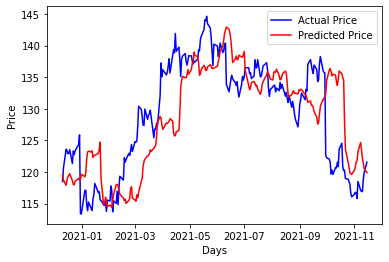

In [35]:
# plot true/pred prices graph
plot_graph(final_df)

In [36]:
final_df.head(10)

,open,high,low,close,adjclose,volume,ticker,ma7,ma21,ma100,...,12ema,MACD,ema,momentum,body,body_abs,close_15,true_close_15,buy_profit,sell_profit
2020-12-10,120.793503,121.347992,119.445503,119.464630,113.741898,5024147,IBM,119.856597,116.217336,116.455449,...,118.597528,2.135147,119.913469,118.464630,-1.328873,1.328873,119.542801,118.489487,-0.975143,0.000000
2020-12-11,118.623329,119.990440,118.173996,118.804970,113.113831,4687544,IBM,119.808795,116.539197,116.413384,...,118.629442,1.993536,119.174470,117.804970,0.181641,0.181641,118.717003,120.592735,0.000000,-1.787766
2020-12-14,119.808792,120.688339,118.040154,118.097511,112.440254,5282300,IBM,119.797869,116.950287,116.377055,...,118.547607,1.803433,118.456497,117.097511,-1.711281,1.711281,117.890991,123.604210,0.000000,-5.506699
2020-12-15,118.919693,120.391968,118.011475,120.391968,114.624809,4556585,IBM,119.624419,117.363653,116.378394,...,118.831355,1.816974,119.746811,119.391968,1.472275,1.472275,118.724297,123.317398,0.000000,-2.925430
2020-12-16,120.391968,121.003822,119.780113,120.028679,114.278923,4738485,IBM,119.740507,117.690977,116.372084,...,119.015558,1.777896,119.934723,119.028679,-0.363289,0.363289,119.247482,122.877632,0.000000,-2.848953
2020-12-17,120.535370,120.544930,119.416824,120.028679,114.278923,3962248,IBM,119.718655,118.048347,116.382409,...,119.171423,1.727019,119.997360,119.028679,-0.506691,0.506691,119.481903,122.925430,0.000000,-2.896751
2020-12-18,120.066925,120.841301,119.474190,120.315491,114.551994,7900229,IBM,119.590275,118.461714,116.387476,...,119.347434,1.690356,120.209447,119.315491,0.248566,0.248566,119.721901,123.527725,0.000000,-3.212234
2020-12-21,118.518166,118.718925,116.367111,117.963669,112.312828,6397022,IBM,119.375852,118.744423,116.392160,...,119.134547,1.454759,118.712262,116.963669,-0.554497,0.554497,118.628098,121.338432,3.374763,0.000000
2020-12-22,117.887192,118.757172,117.026772,118.173996,112.513077,4535561,IBM,119.285713,119.048074,116.398566,...,118.986770,1.270374,118.353418,117.173996,0.286804,0.286804,118.010796,123.298279,0.000000,-5.124283
2020-12-23,118.432121,119.703636,118.298279,118.451241,112.777046,2817819,IBM,119.336246,119.221524,116.394646,...,118.904381,1.133552,118.418633,117.451241,0.019119,0.019119,117.974426,122.743790,0.000000,-4.292549


In [37]:
# final_df.tail(10)

In [38]:
# save the final dataframe to csv-results folder
# csv_filename = os.path.join("test_results", model_name + ".csv")
final_df.to_csv(os.path.join(new_results + "/test-results", model_name + ".csv"))
# xls_filename = os.path.join("test_results", model_name + ".xlsx")
final_df.to_excel(os.path.join(new_results + "/test-results", model_name + ".xlsx"))

In [39]:
candles = final_df
import datetime
candles.rename(columns={f'close_{LOOKUP_STEP}':'predict',f'true_close_{LOOKUP_STEP}':'test'}, inplace=True)

In [40]:
i = 0
poz = 0
trade = "" 
profit = 0
year = ''
# typeTrade = 'long'
# typeTrade = 'short'
typeTrade = 'short_long'




profit_y = pd.DataFrame
for index, row in final_df.iterrows():
    i = i + 1
    
    if i == 1:
        openPrice = row['close']
        
    closePrice = row['close']
    
    if (typeTrade == 'long' or typeTrade == 'short_long') and poz == 0 and row['close'] < row['predict']:
        poz = row['close']
        trade = "long"
        print(index.strftime("%Y/%m/%d"), trade, round(poz))
        year =  index.year
        continue
    
    if (typeTrade == 'short' or typeTrade == 'short_long') and poz == 0 and row['close'] > row['predict']:
        poz = row['close']
        trade = "short"
        print(index.strftime("%Y/%m/%d"), trade, round(poz))
        year =  index.year
        continue    
    
    if  (typeTrade == 'long'  or typeTrade == 'short_long') and trade == 'long' and row['close'] > row['predict']:
        trade = "short"
        profit = profit + row['close'] - poz
#         print(index.strftime("%Y/%m/%d"), trade, round(row['close']) , "Profit:", round(row['close'] - poz))
        if typeTrade == 'short_long':            
            print(index.strftime("%Y/%m/%d"), trade, round(row['close']) , "Profit:", round(row['close'] - poz))
            poz = row['close']
        if typeTrade == 'long':
            print(index.strftime("%Y/%m/%d"), 'Close', round(row['close']) , "Profit:", round(row['close'] - poz))
            poz = 0
        continue  
        
        
    if  (typeTrade == 'short' or typeTrade == 'short_long') and trade == 'short' and row['close'] < row['predict']:
        trade = "long"
        profit = profit + poz - row['close']
        
#         poz = row['close']
        if (typeTrade == 'short_long'):            
            print(index.strftime("%Y/%m/%d"), trade, round(row['close']) , "Profit:", round(poz - row['close']))
            poz = row['close']
        if typeTrade == 'short':            
            print(index.strftime("%Y/%m/%d"), 'Close', round(row['close']) , "Profit:", round(poz - row['close']))
            poz = 0
        continue  
        
#     if trade == 'long' and row['close'] > row['predict']:
#         trade = "short"
#         profit = profit + row['close'] - poz
#         print(index.strftime("%Y/%m/%d"), trade, round(row['close']) , "Profit:", round(row['close'] - poz))
#         #poz = row['close']
#         if (typeTrade == 'short' or typeTrade == 'short_long'):
#             poz = row['close']
#         else:
#             poz = 0
#             trade = "short"
#         continue  
            
                
    
    
#     if year != index.year:
#         profit_y.year = profit
        
    

print()

if trade == 'long' :
    profit = profit + closePrice - poz

if trade == 'short':
    profit = profit + poz - closePrice

print(index.strftime("%Y/%m/%d"), round(poz) , round(closePrice), " -=-=-= Close",trade)       
print()
print('Trade:',trade,'Poz:',round(poz))        
print('Profit:', round(profit),round(profit/openPrice*100),"%")   

# pprofit_y
# for py in profit_y:
#     print(py)

print(i)

2020/12/10 long 119
2020/12/11 short 119 Profit: -1
2020/12/21 long 118 Profit: 1
2020/12/22 short 118 Profit: 0
2020/12/29 long 118 Profit: 0
2020/12/30 short 119 Profit: 1
2021/01/04 long 118 Profit: 0
2021/01/05 short 121 Profit: 2
2021/01/08 long 123 Profit: -2
2021/01/12 short 124 Profit: 1
2021/01/13 long 121 Profit: 2
2021/01/14 short 123 Profit: 2
2021/01/22 long 113 Profit: 10
2021/01/26 short 117 Profit: 4
2021/01/28 long 115 Profit: 2
2021/02/01 short 115 Profit: 0
2021/02/02 long 114 Profit: 1
2021/02/04 short 116 Profit: 2
2021/02/05 long 116 Profit: -1
2021/02/08 short 118 Profit: 2
2021/02/09 long 117 Profit: 1
2021/02/22 short 116 Profit: -1
2021/02/23 long 115 Profit: 0
2021/02/24 short 118 Profit: 2
2021/02/25 long 117 Profit: 1
2021/03/03 short 117 Profit: 0
2021/03/04 long 115 Profit: 2
2021/03/05 short 117 Profit: 3
2021/03/09 long 119 Profit: -1
2021/03/10 short 122 Profit: 4
2021/03/11 long 122 Profit: 1
2021/03/15 short 123 Profit: 1
2021/03/19 long 123 Profit: 

In [41]:
# Рисует основной график
def draw_candles(candles):
    # Добавим на график несколько ЕМА-средних
    # candles['ema100'] = pd.Series.ewm(candles['close'], span=100).mean()
    # candles['ema50'] = pd.Series.ewm(candles['close'], span=50).mean()
    # candles['ema20'] = pd.Series.ewm(candles['close'], span=20).mean()
    # candles['26ema'] = pd.Series.ewm(candles['close'], span=26).mean()
    # candles['12ema'] = pd.Series.ewm(candles['close'], span=12).mean()
    # candles['MACD'] = (candles['12ema']-candles['26ema'])
    plt.style.use('ggplot')  # 'seaborn-paper'
    # Отображаем график по цене закрытия свечей и ЕМА-шки
    fig = candles.plot(y=['test', 'predict','close'], figsize=(25, 16))
    # Добавляем заголовок
    fig.set_title('График ' + ticker)
    # Рисуем шкалу с датами
    PlotDatesX(fig, candles)

# Определяет начальную и конечную позицию Х (по индексу свечей) для заданной даты. Пригодится при отрисовке ценовых уровней
def DateX(date, candles):
    # Цикл по датам в свечах, результат - список X-координат, соответствующих заданной дате
    xpositions = [index for index, row in candles.iterrows() if row['date'].date() == date]
    # Возвращает список - пару начальная координата Х и конечная координата Х для заданной даты на графике
    if xpositions == []:
        return [len(candles) - 1, len(candles)]  # На случай если за текущую дату нет еще свечей
    return [xpositions[0], xpositions[-1]]


# Рисует метки дат на оси Х
def PlotDatesX(fig, candles):
    # Составляем список дат (только уникальные даты) из столбца DT. Они будут метками на оси Х. Сортировка по датам
    # обязательна, т.к. при создании множества(set) даже из отсортированного списка, множество может не сохранить порядок списка
    dates = sorted(set(map(lambda dt: datetime.date(dt), candles['date'])))
    # Создаем список координат Х для каждой метки (даты). Нам нужна только первая позиция - [0].
    xlabel = [DateX(d, candles)[0] for d in dates]
    # Рисуем ось Х, разделенную по датам
    fig.set_xticklabels(dates)
    fig.set_xticks(xlabel)
    return dates, xlabel

In [42]:
if collab:
    copy_tree(new_results + "/results", data_path + "/results" )
    copy_tree(new_results + "/logs", data_path + "/logs")
    copy_tree(new_results + "/data", data_path + "/data")
    copy_tree(new_results + "/test-results", data_path + "/test-results")
# Arc folders with results
shutil.make_archive(new_results, 'zip', new_results)

'C:\\Users\\sem\\PycharmProjects\\python.Neural.Market\\stock-prediction\\IBM_2000_test2021_close.zip'

KeyError: 'date'

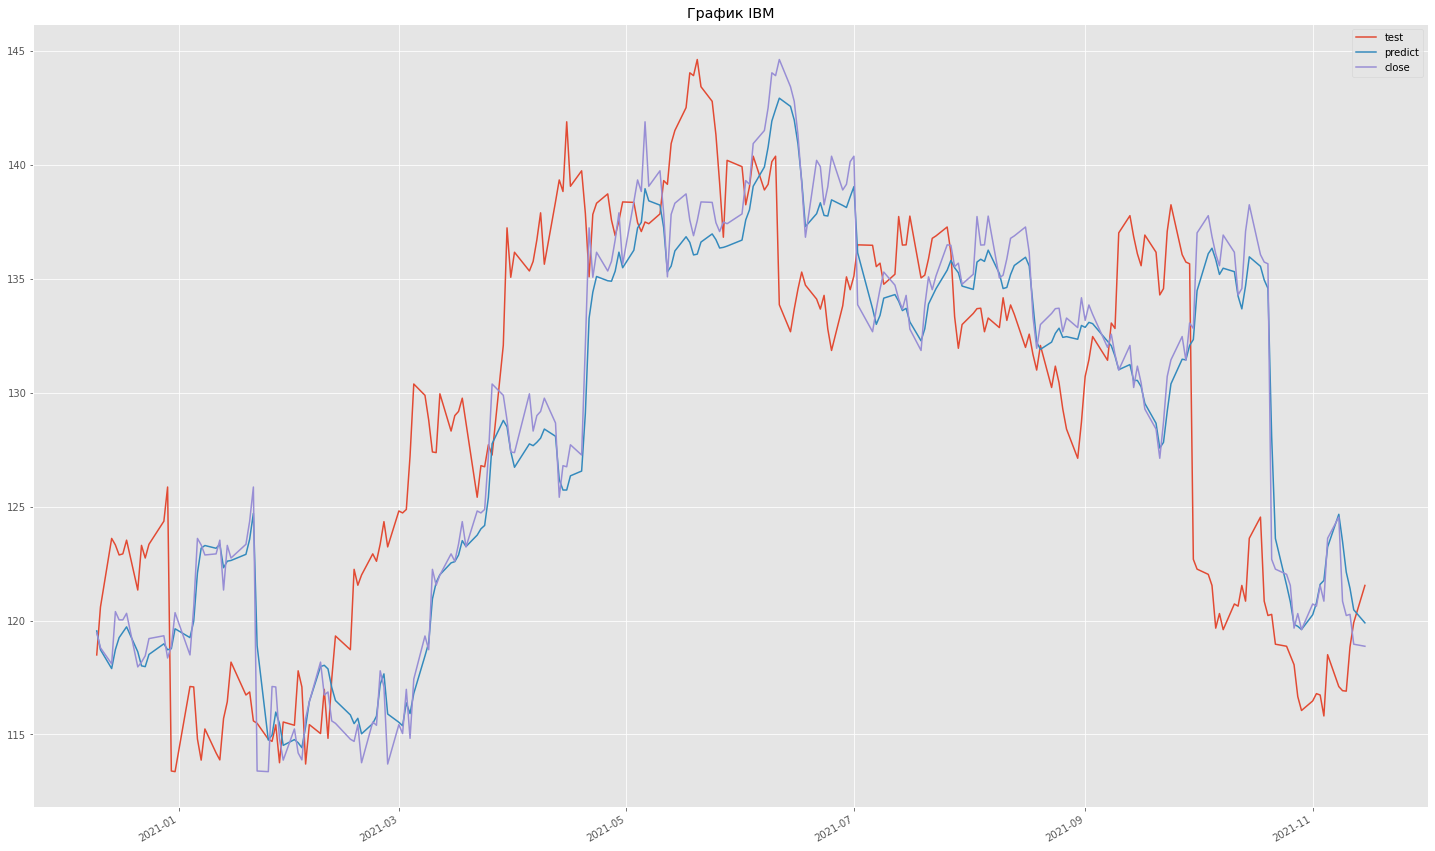

In [43]:
draw_candles(candles.tail(1000))